In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
test = pd.read_csv('Test.csv')

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [6]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [7]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [8]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [9]:
train.shape

(18288, 3)

In [10]:
test.shape

(5112, 2)

In [11]:
train.head()

ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [12]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')

In [13]:
train.head()

ID            Datetime  Count
0   0 2012-08-25 00:00:00      8
1   1 2012-08-25 01:00:00      2
2   2 2012-08-25 02:00:00      6
3   3 2012-08-25 03:00:00      2
4   4 2012-08-25 04:00:00      2

In [14]:
test['Datetime'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')

In [15]:
train_original['Datetime'] = pd.to_datetime(train_original['Datetime'],format='%d-%m-%Y %H:%M')

In [16]:
test_original['Datetime'] = pd.to_datetime(test_original['Datetime'],format='%d-%m-%Y %H:%M')

### Hypothesis generation

Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

1. There will be an increase in the traffic as the years pass by.
2. The traffic will be high from May to October.
3. Traffic on weekdays will be more as compared to weekends/holidays.
4. Traffic during the peak hours will be high.

We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.

In [17]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [18]:
train.head()

ID            Datetime  Count  year  month  day  Hour
0   0 2012-08-25 00:00:00      8  2012      8   25     0
1   1 2012-08-25 01:00:00      2  2012      8   25     1
2   2 2012-08-25 02:00:00      6  2012      8   25     2
3   3 2012-08-25 03:00:00      2  2012      8   25     3
4   4 2012-08-25 04:00:00      2  2012      8   25     4

In [19]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [20]:
train.head()

ID            Datetime  Count  year  month  day  Hour  day of week
0   0 2012-08-25 00:00:00      8  2012      8   25     0            5
1   1 2012-08-25 01:00:00      2  2012      8   25     1            5
2   2 2012-08-25 02:00:00      6  2012      8   25     2            5
3   3 2012-08-25 03:00:00      2  2012      8   25     3            5
4   4 2012-08-25 04:00:00      2  2012      8   25     4            5

In [21]:
def weekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [22]:
temp2 = train['Datetime'].apply(weekend) 

In [23]:
train['weekend'] = temp2

In [24]:
train.head()

ID            Datetime  Count  year  month  day  Hour  day of week  weekend
0   0 2012-08-25 00:00:00      8  2012      8   25     0            5        1
1   1 2012-08-25 01:00:00      2  2012      8   25     1            5        1
2   2 2012-08-25 02:00:00      6  2012      8   25     2            5        1
3   3 2012-08-25 03:00:00      2  2012      8   25     3            5        1
4   4 2012-08-25 04:00:00      2  2012      8   25     4            5        1

#### Visualize the Time Series

In [25]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 

In [26]:
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 

In [27]:
ts = df['Count'] 

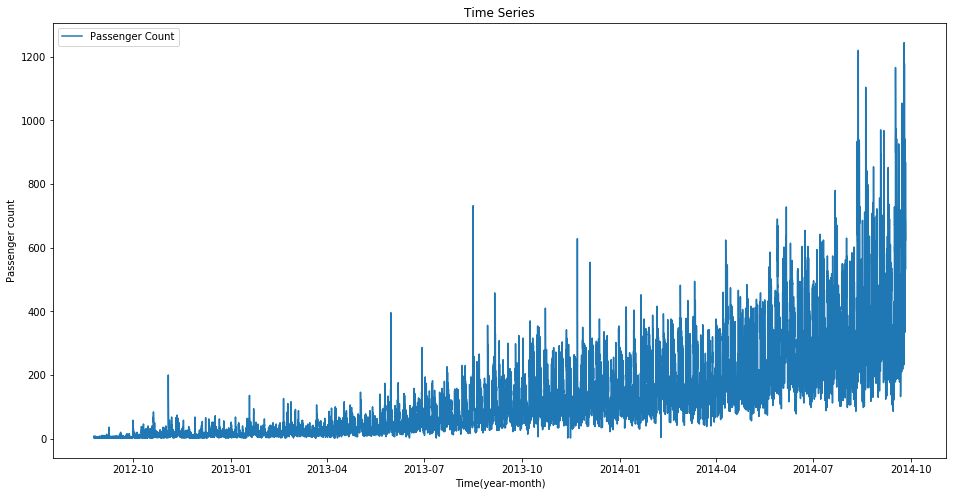

In [28]:
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

   #### Exploratory Analysis

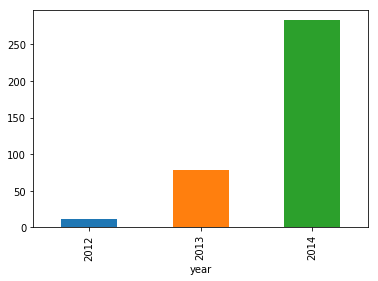

In [34]:
train.groupby('year')['Count'].mean().plot.bar()

    We see an exponential growth in the traffic with respect to year which validates our hypothesis.

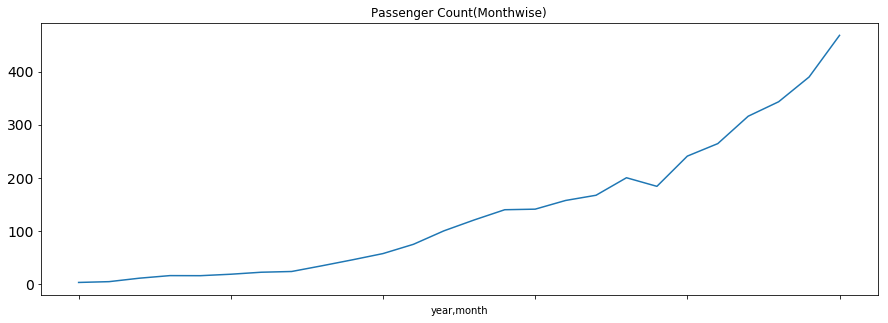

In [46]:
train.groupby(['year','month'])['Count'].mean().plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)


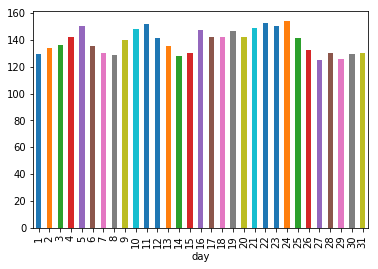

In [47]:
train.groupby('day')['Count'].mean().plot.bar()

    We are not getting much insights from day wise count of the passengers.

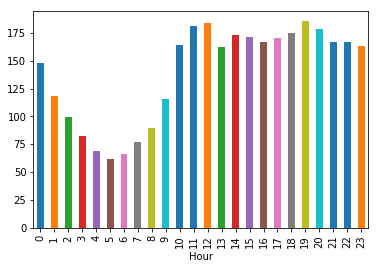

In [48]:
train.groupby('Hour')['Count'].mean().plot.bar()

    It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
    After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

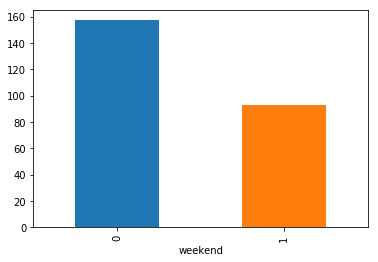

In [49]:
train.groupby('weekend')['Count'].mean().plot.bar()

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

In [51]:
train.head()

ID            Datetime  Count  year  month  day  Hour  \
Datetime                                                                     
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8  2012      8   25     0   
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2  2012      8   25     1   
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6  2012      8   25     2   
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2  2012      8   25     3   
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2  2012      8   25     4   

                     day of week  weekend  
Datetime                                   
2012-08-25 00:00:00            5        1  
2012-08-25 01:00:00            5        1  
2012-08-25 02:00:00            5        1  
2012-08-25 03:00:00            5        1  
2012-08-25 04:00:00            5        1

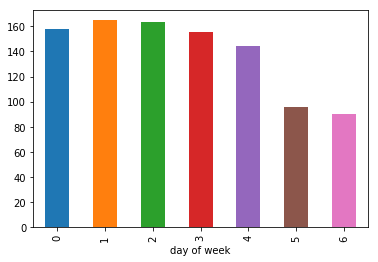

In [52]:
train.groupby('day of week')['Count'].mean().plot.bar()

From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week.

In [53]:
train = train.drop('ID',1)